In [1]:
import ambulance_game as abg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_mean_blocking_difference_using_markov(
    prop_1,
    lambda_2,
    lambda_1_1,
    lambda_1_2,
    mu_1,
    mu_2,
    num_of_servers_1,
    num_of_servers_2,
    threshold_1,
    threshold_2,
    system_capacity_1,
    system_capacity_2,
    buffer_capacity_1,
    buffer_capacity_2,
    alpha=0,
    **kwargs,  # pylint: disable=unused-argument
):
    lambda_2_1 = prop_1 * lambda_2
    lambda_2_2 = (1 - prop_1) * lambda_2

    mean_blocking_time_1 = abg.markov.get_mean_blocking_time_using_markov_state_probabilities(
        lambda_2=lambda_2_1,
        lambda_1=lambda_1_1,
        mu=mu_1,
        num_of_servers=num_of_servers_1,
        threshold=threshold_1,
        system_capacity=system_capacity_1,
        buffer_capacity=buffer_capacity_1,
    )
    mean_blocking_time_2 = abg.markov.get_mean_blocking_time_using_markov_state_probabilities(
        lambda_2=lambda_2_2,
        lambda_1=lambda_1_2,
        mu=mu_2,
        num_of_servers=num_of_servers_2,
        threshold=threshold_2,
        system_capacity=system_capacity_2,
        buffer_capacity=buffer_capacity_2,
    )
    prob_accept_1 = abg.markov.get_accepting_proportion_of_class_2_individuals(
        lambda_1=lambda_1_1,
        lambda_2=lambda_2_1,
        mu=mu_1,
        num_of_servers=num_of_servers_1,
        threshold=threshold_1,
        system_capacity=system_capacity_1,
        buffer_capacity=buffer_capacity_1,
    )
    prob_accept_2 = abg.markov.get_accepting_proportion_of_class_2_individuals(
        lambda_1=lambda_1_2,
        lambda_2=lambda_2_2,
        mu=mu_2,
        num_of_servers=num_of_servers_2,
        threshold=threshold_2,
        system_capacity=system_capacity_2,
        buffer_capacity=buffer_capacity_2,
    )

    decision_value_1 = alpha * (1 - prob_accept_1) + (1 - alpha) * mean_blocking_time_1
    decision_value_2 = alpha * (1 - prob_accept_2) + (1 - alpha) * mean_blocking_time_2

    return decision_value_1, decision_value_2

In [3]:
def get_mean_blocking_for_different_values_of_p_a(
    lambda_2 ,
    lambda_1_A,
    mu_A,
    num_of_servers_A,
    threshold_A,
    system_capacity_A,
    buffer_capacity_A,
    lambda_1_B,
    mu_B,
    num_of_servers_B,
    threshold_B,
    system_capacity_B,
    buffer_capacity_B,
    alpha,
):
    p_A_values = np.linspace(0, 1, 20)
    all_diffs = []
    all_decision_values_1 = []
    all_decision_values_2 = []
    for p_A in p_A_values:
        decision_values = (
            get_mean_blocking_difference_using_markov(
                prop_1=p_A,
                lambda_2=lambda_2,
                lambda_1_1=lambda_1_A,
                mu_1=mu_A,
                num_of_servers_1=num_of_servers_A,
                threshold_1=threshold_A,
                system_capacity_1=system_capacity_A,
                buffer_capacity_1=buffer_capacity_A,
                lambda_1_2=lambda_1_B,
                mu_2=mu_B,
                num_of_servers_2=num_of_servers_B,
                threshold_2=threshold_B,
                system_capacity_2=system_capacity_B,
                buffer_capacity_2=buffer_capacity_B,
                alpha=alpha,
            )
        )
        all_decision_values_1.append(decision_values[0])
        all_decision_values_2.append(decision_values[1])
        all_diffs.append(decision_values[0] - decision_values[1])
    return all_diffs, all_decision_values_1, all_decision_values_2

# Brent's method visualisation

In [4]:
lambda_2 = 4

lambda_1_A = 2
mu_A = 2
num_of_servers_A = 3
threshold_A = 8
system_capacity_A = 15
buffer_capacity_A = 10

lambda_1_B = 1
mu_B = 1
num_of_servers_B = 3
threshold_B = 10
system_capacity_B = 10
buffer_capacity_B = 5

alpha = 0.2

In [5]:
all_diffs, all_decision_values_1, all_decision_values_2 = get_mean_blocking_for_different_values_of_p_a(
    lambda_2=lambda_2,
    lambda_1_A=lambda_1_A,
    mu_A=mu_A,
    num_of_servers_A=num_of_servers_A,
    threshold_A=threshold_A,
    system_capacity_A=system_capacity_A,
    buffer_capacity_A=buffer_capacity_A,
    lambda_1_B=lambda_1_B,
    mu_B=mu_B,
    num_of_servers_B=num_of_servers_B,
    threshold_B=threshold_B,
    system_capacity_B=system_capacity_B,
    buffer_capacity_B=buffer_capacity_B,
    alpha=alpha,
)

In [6]:
p_A_values = np.linspace(0, 1, 20)

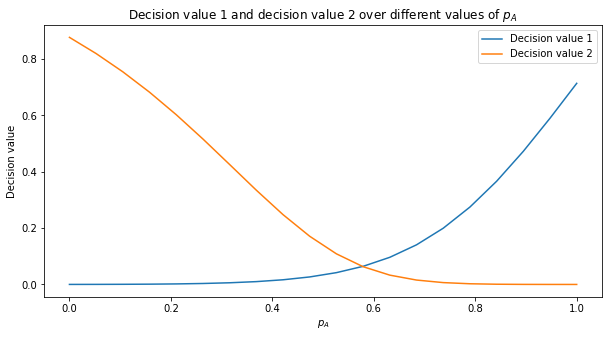

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(p_A_values, all_decision_values_1, label="Decision value 1")
plt.plot(p_A_values, all_decision_values_2, label="Decision value 2")
plt.xlabel(f"$p_A$")
plt.ylabel("Decision value")
plt.title("Decision value 1 and decision value 2 over different values of $p_A$")
plt.legend()
plt.savefig("brent_method_example.pdf", transparent=True)

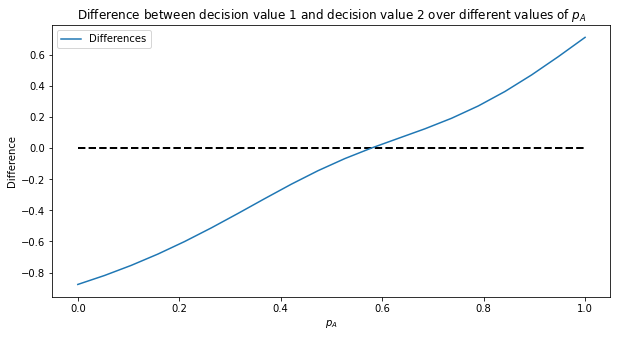

In [8]:
plt.figure(figsize=(10, 5))
plt.hlines(0, 0, 1, linestyles="dashed", colors="black", linewidth=2)
plt.plot(p_A_values, all_diffs, label="Differences")
plt.xlabel(f"$p_A$")
plt.ylabel("Difference")
plt.title("Difference between decision value 1 and decision value 2 over different values of $p_A$")
plt.legend()
plt.savefig("brent_method_diffs.pdf")

### Different values of $\mu_1$

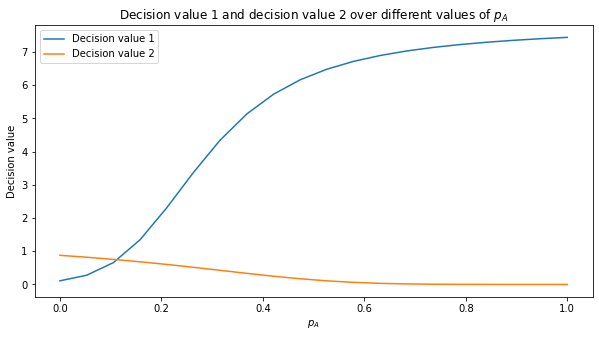

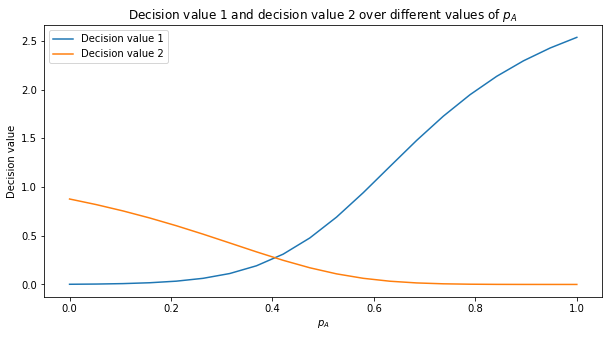

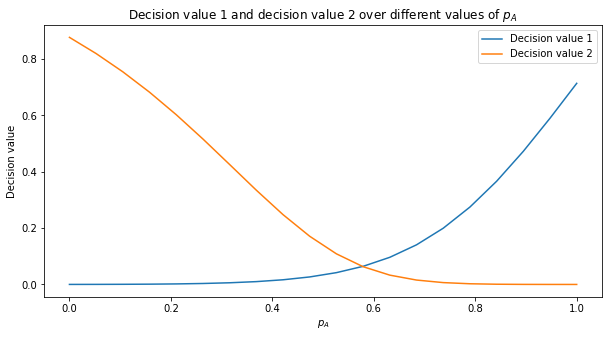

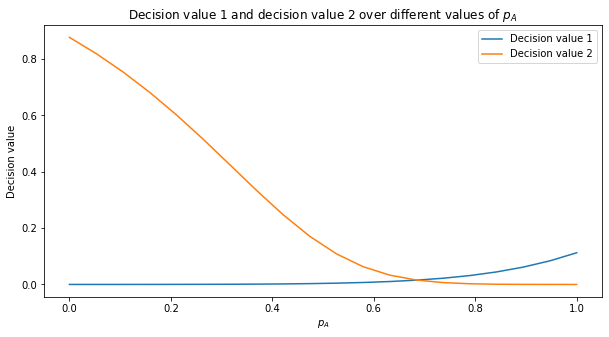

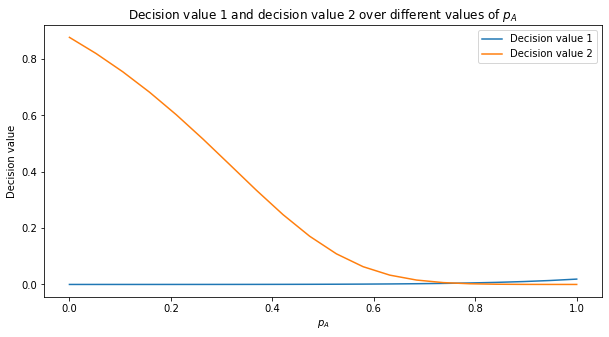

In [188]:
mu_A_values = np.linspace(1, 3, 5)
for mu_A_value in mu_A_values:
    all_diffs_1, all_decision_values_1, all_decision_values_2 = get_mean_blocking_for_different_values_of_p_a(
        lambda_2=lambda_2,
        lambda_1_A=lambda_1_A,
        mu_A=mu_A_value,
        num_of_servers_A=num_of_servers_A,
        threshold_A=threshold_A,
        system_capacity_A=system_capacity_A,
        buffer_capacity_A=buffer_capacity_A,
        lambda_1_B=lambda_1_B,
        mu_B=mu_B,
        num_of_servers_B=num_of_servers_B,
        threshold_B=threshold_B,
        system_capacity_B=system_capacity_B,
        buffer_capacity_B=buffer_capacity_B,
        alpha=alpha,
    )

    plt.figure(figsize=(10, 5))
    plt.plot(p_A_values, all_decision_values_1, label="Decision value 1")
    plt.plot(p_A_values, all_decision_values_2, label="Decision value 2")
    plt.xlabel(f"$p_A$")
    plt.ylabel("Decision value")
    plt.title("Decision value 1 and decision value 2 over different values of $p_A$")
    plt.legend()
    plt.savefig(f"brent_method_example_mu_A_{mu_A_value}.pdf")

# Different values of $\alpha$

In [23]:
lambda_2 = 4

lambda_1_A = 2
mu_A = 2
num_of_servers_A = 3
threshold_A = 8
system_capacity_A = 15
buffer_capacity_A = 10

lambda_1_B = 1
mu_B = 1
num_of_servers_B = 3
threshold_B = 6
system_capacity_B = 6
buffer_capacity_B = 1

alpha = 0.2

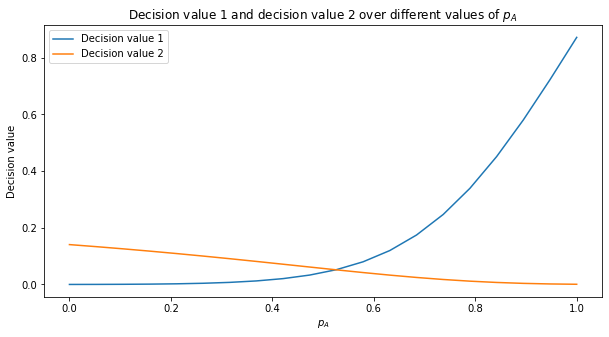

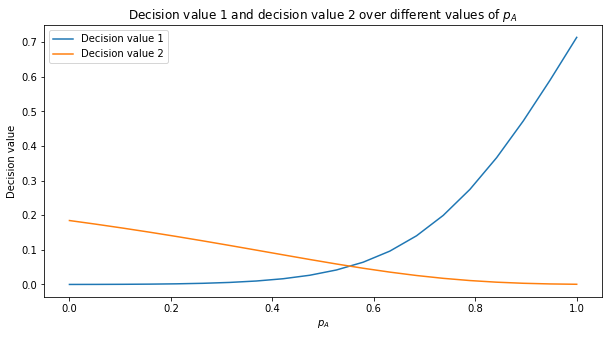

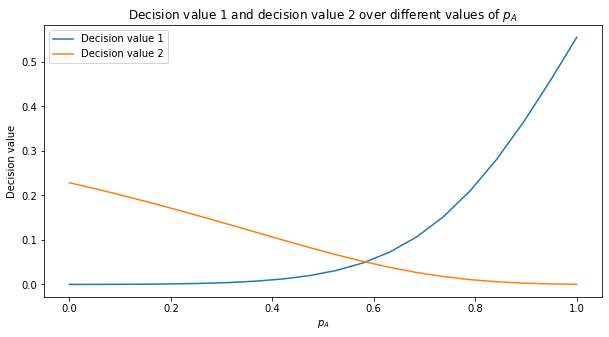

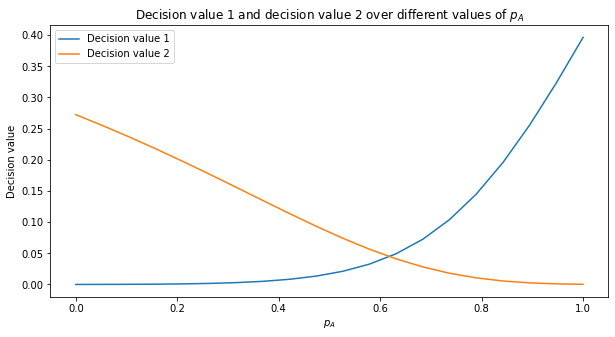

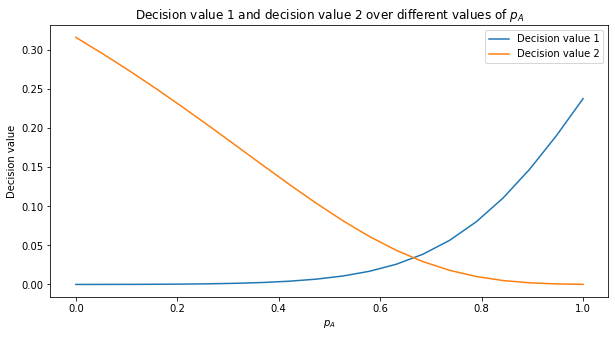

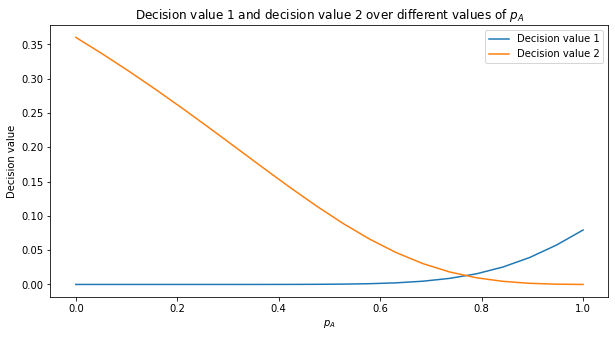

In [24]:
alpha_values = np.linspace(0, 1, 6)
for alpha_value in alpha_values:
    all_diffs_1, all_decision_values_1, all_decision_values_2 = get_mean_blocking_for_different_values_of_p_a(
        lambda_2=lambda_2,
        lambda_1_A=lambda_1_A,
        mu_A=mu_A,
        num_of_servers_A=num_of_servers_A,
        threshold_A=threshold_A,
        system_capacity_A=system_capacity_A,
        buffer_capacity_A=buffer_capacity_A,
        lambda_1_B=lambda_1_B,
        mu_B=mu_B,
        num_of_servers_B=num_of_servers_B,
        threshold_B=threshold_B,
        system_capacity_B=system_capacity_B,
        buffer_capacity_B=buffer_capacity_B,
        alpha=alpha_value,
    )

    plt.figure(figsize=(10, 5))
    plt.plot(p_A_values, all_decision_values_1, label="Decision value 1")
    plt.plot(p_A_values, all_decision_values_2, label="Decision value 2")
    plt.xlabel(f"$p_A$")
    plt.ylabel("Decision value")
    plt.title("Decision value 1 and decision value 2 over different values of $p_A$")
    plt.legend()
    # plt.savefig(f"brent_method_example_alpha_{alpha_value}.pdf")

# $p_A=1$ example

In [52]:
lambda_2 = 4

lambda_1_A = 2
mu_A = 2
num_of_servers_A = 3
threshold_A = 15
system_capacity_A = 15
buffer_capacity_A = 10

lambda_1_B = 1
mu_B = 1
num_of_servers_B = 3
threshold_B = 2
system_capacity_B = 10
buffer_capacity_B = 5

alpha = 0.2

In [53]:
p_A_values = np.linspace(0, 1, 20)

In [54]:
all_diffs = []
all_decision_values_1 = []
all_decision_values_2 = []
for p_A in p_A_values:
    decision_values = (
        get_mean_blocking_difference_using_markov(
            prop_1=p_A,
            lambda_2=lambda_2,
            lambda_1_1=lambda_1_A,
            mu_1=mu_A,
            num_of_servers_1=num_of_servers_A,
            threshold_1=threshold_A,
            system_capacity_1=system_capacity_A,
            buffer_capacity_1=buffer_capacity_A,
            lambda_1_2=lambda_1_B,
            mu_2=mu_B,
            num_of_servers_2=num_of_servers_B,
            threshold_2=threshold_B,
            system_capacity_2=system_capacity_B,
            buffer_capacity_2=buffer_capacity_B,
            alpha=0.2,
        )
    )
    all_decision_values_1.append(decision_values[0])
    all_decision_values_2.append(decision_values[1])
    all_diffs.append(decision_values[0] - decision_values[1])

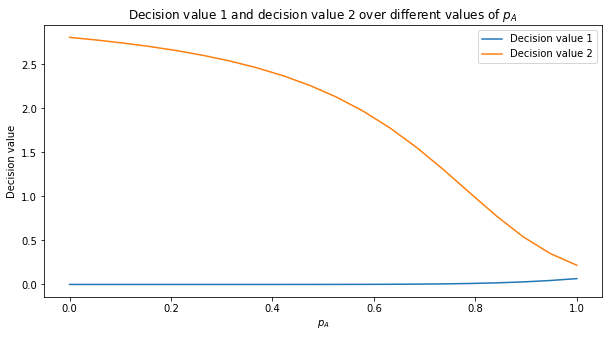

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(p_A_values, all_decision_values_1, label="Decision value 1")
plt.plot(p_A_values, all_decision_values_2, label="Decision value 2")
plt.xlabel(f"$p_A$")
plt.ylabel("Decision value")
plt.title("Decision value 1 and decision value 2 over different values of $p_A$")
plt.legend()
plt.savefig("brent_method_special_case.pdf")

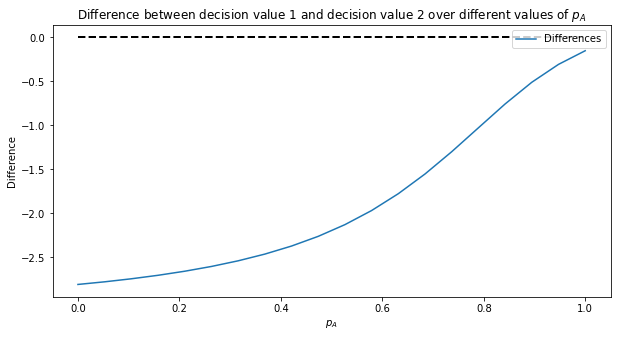

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(p_A_values, all_diffs, label="Differences")
plt.hlines(0, 0, 1, linestyles="dashed", colors="black", linewidth=2)
plt.xlabel(f"$p_A$")
plt.ylabel("Difference")
plt.title("Difference between decision value 1 and decision value 2 over different values of $p_A$")
plt.legend()
plt.savefig("brent_method_special_case_diffs.pdf")